In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to display all columns
pd.pandas.set_option('display.max_columns', None)

In [90]:
dataset=pd.read_csv('vgsales.csv')

In [91]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [92]:
dataset.shape

(16598, 11)

## Missing Values

In [94]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [95]:
#columns with NaN values
features_na = [features for features in dataset.columns if dataset[features].isnull().sum() >0] 

In [96]:
features_na

['Year', 'Publisher']

In [97]:
# to find percentage of NaN Values
for feature in features_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100,5), '% missing values')

Year 1.63273 % missing values
Publisher 0.34944 % missing values


<Axes: ylabel='Global_Sales'>

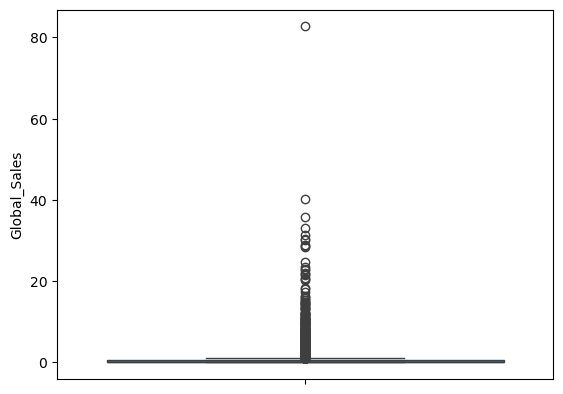

In [98]:
sns.boxplot(dataset['Global_Sales'])

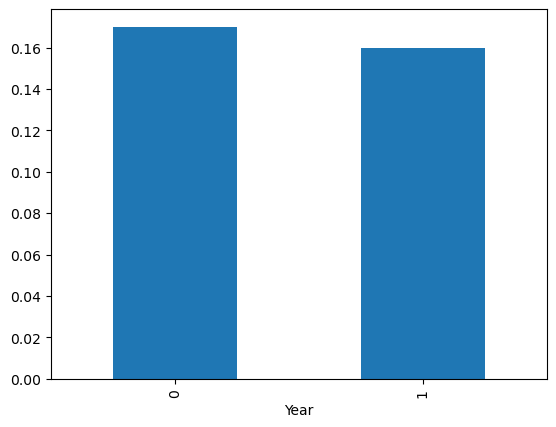

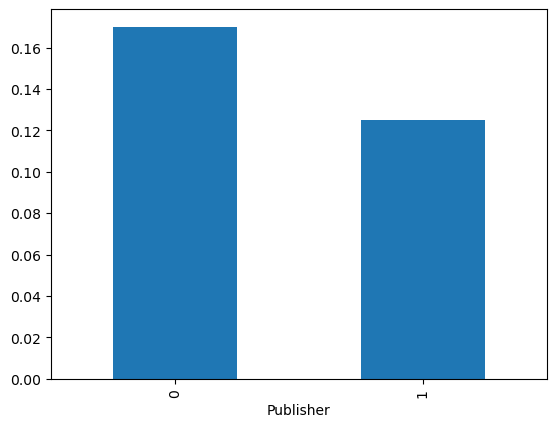

In [99]:
#checking the relation between NaN values and sales

data = dataset.copy()

for feature in features_na:

    data[feature] = np.where(data[feature].isnull(), 1, 0)

    data.groupby(feature)['Global_Sales'].median().plot.bar()
    plt.show()

Here with the relation between the missing values and the dependent variable is clearly visible. So we need to replace these NaN values with something meaningful which we will do in the Feature Engineering section


## Numerical Variables

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [103]:
## list of numerical values
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

In [104]:
print(len(numerical_features))
print(data[numerical_features].head())

7
   Rank  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1     0     41.49     29.02      3.77         8.46         82.74
1     2     0     29.08      3.58      6.81         0.77         40.24
2     3     0     15.85     12.88      3.79         3.31         35.82
3     4     0     15.75     11.01      3.28         2.96         33.00
4     5     0     11.27      8.89     10.22         1.00         31.37


Text(0.5, 1.0, 'Global Sales of Video Games by Year')

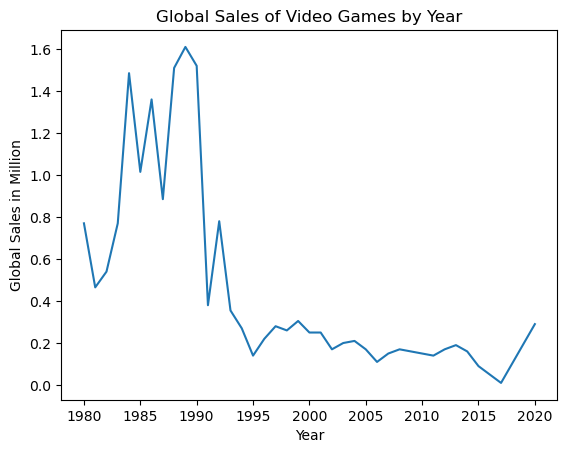

In [105]:
dataset.groupby('Year')['Global_Sales'].median().plot()
plt.xlabel('Year')
plt.ylabel('Global Sales in Million')
plt.title('Global Sales of Video Games by Year')

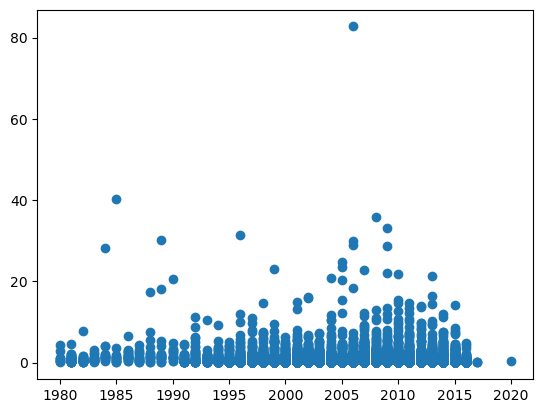

In [106]:
plt.scatter(dataset['Year'], dataset['Global_Sales'])

In [107]:
discrete_features = [features for features in numerical_features if len(dataset[features].unique()) < 50]
discrete_features

['Year']

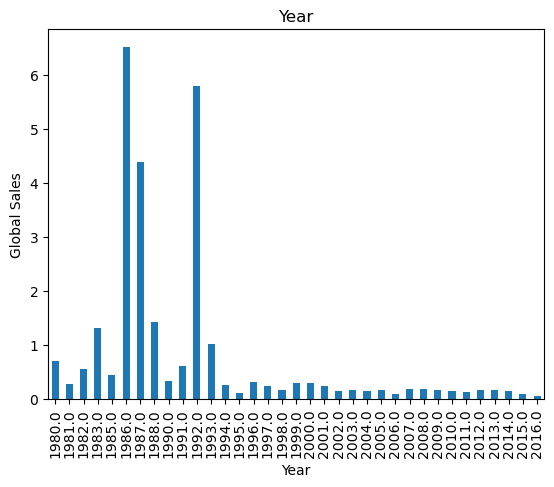

In [108]:
data = dataset.copy()
data_sample = data.sample(frac=0.1,random_state=42)
for feature in discrete_features:
    data_sample.groupby(feature)['Global_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.title(feature)
    plt.show()

## Categorical Variables

In [110]:
categ_features = [features for features in dataset.columns if dataset[features].dtypes == 'object']
dataset[categ_features].head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [111]:
for feature in categ_features:
    print("feature name is {} and number of categories are {}".format(feature, len(dataset[feature].unique())))

feature name is Name and number of categories are 11493
feature name is Platform and number of categories are 31
feature name is Genre and number of categories are 12
feature name is Publisher and number of categories are 579


## Feature Engineering

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X= dataset.drop(["Rank", "Global_Sales"], axis=1)
y= dataset["Global_Sales"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [116]:
X_train

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16336,Nakayoshi All-Stars: Mezase Gakuen Idol,DS,2008.0,Misc,Creative Core,0.00,0.00,0.01,0.00
10236,Transformers: Devastation,PS3,2015.0,Action,Activision,0.03,0.07,0.00,0.02
5430,Dynasty Warriors: Gundam 2,PS2,2008.0,Action,Namco Bandai Games,0.04,0.03,0.25,0.01
15405,Vitamin R,PSP,2013.0,Adventure,D3Publisher,0.00,0.00,0.02,0.00
8961,High Velocity Bowling,PS3,2010.0,Sports,Sony Computer Entertainment,0.13,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...
671,LEGO Harry Potter: Years 1-4,DS,2010.0,Action,Warner Bros. Interactive Entertainment,1.07,1.05,0.00,0.23
8912,Brain Boost: Beta Wave,DS,2005.0,Puzzle,505 Games,0.14,0.00,0.00,0.01
2739,Turok,X360,2008.0,Action,Touchstone,0.46,0.21,0.01,0.07
9095,Soukaigi,PS,1998.0,Role-Playing,SquareSoft,0.00,0.00,0.13,0.01


In [117]:
# Handling Missing Values

features_na = [features for features in dataset.columns if dataset[features].isnull().sum()>0]
for feature in features_na:
    print("The feature is {} and the missing value is {}%".format(feature, np.round(dataset[feature].isnull().mean()*100,4)))

The feature is Year and the missing value is 1.6327%
The feature is Publisher and the missing value is 0.3494%


In [118]:
# For Categorical Features

categ_features = [features for features in dataset.columns if dataset[features].dtypes == "object"]

In [119]:
categ_features

['Name', 'Platform', 'Genre', 'Publisher']

In [120]:
data=dataset.copy()

def replace_categ_features(dataset,categorical_features):
    data[categorical_features]= data[categorical_features].fillna('Missing')
    return data

In [121]:
replace_categ_features(dataset,categ_features)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [122]:
num_features_nan = [features for features in dataset.columns if dataset[features].dtypes!='object' and dataset[features].isnull().sum()>0]

In [123]:
num_features_nan

['Year']

In [173]:
for feature in num_features_nan:
    median_values = dataset[feature].median()
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset.fillna({feature:median_values}, inplace=True)

In [175]:
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Yearnan,Publishernan
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0,0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0,0


In [177]:
dataset['Publisher'].isnull().sum()

0

In [179]:
categ_features_na = [features for features in dataset.columns if dataset[features].dtypes=='object' and dataset[features].isnull().sum()>0]
categ_features_na

[]

In [181]:
for feature in categ_features_na:
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset.fillna({feature: 'Missing'}, inplace=True)

In [183]:
dataset['Publisher'].isnull().sum()

0

In [185]:
dataset.to_csv('data.csv')